# mm_figs_r1

### This notebook generates figures to use in the revisions for Ramayya et al.  eNeuro resubmission (2020)

In [1]:
#import packages
import numpy as np # numpy
import pandas as pd # pandas
import mne
import pickle

import os
from scipy.io import loadmat # to load matlab
from scipy import stats,ndimage,signal,spatial
import statsmodels.formula.api as smf
import numpy.random as rand
import pycircstat as circ
import fooof as ff
import tensorpac as tp
import mm_func_v2 as mm
import time

# plotting
import matplotlib
#matplotlib.use('macosx')
matplotlib.use('Qt5Agg')

# this makes tight axes 
matplotlib.rcParams['axes.autolimit_mode'] = 'round_numbers'
matplotlib.rcParams['axes.xmargin'] = 0
matplotlib.rcParams['axes.ymargin'] = 0
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt 

# create fig dir
fig_dir = '/Users/ashwinramayya/Dropbox/neurosurgery_research/manuscripts/motormap/r1/figs/'
if os.path.exists(fig_dir)==False:
     os.mkdir(fig_dir)

def save_fig(fname):
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(fname = fig_dir+fname+'.pdf')

#
groupDf = mm.groupDf

#
roi_list = ['prefrontal','perirolandic','parietal','temporal','MTL']

### Figure 1. Methods

#### a) Task schematic [x]

#### b) Brain plot showing all the the electrodes [x]

#### c) Methods 
[] eeg raw time series </br>
[] power spectrum (log-transformed)</br> 
[] Wavelets </br>
[x] Omnibus test with null distributions with null distribution</br> 
Freq of interest

/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/s

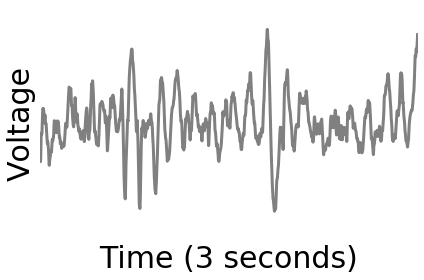

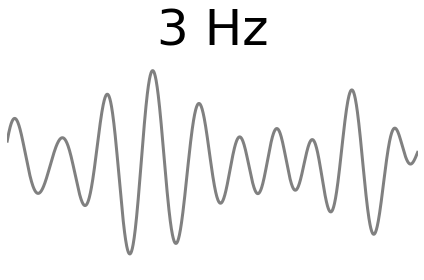

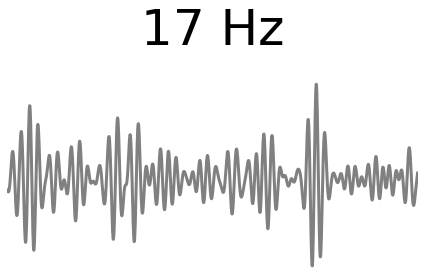

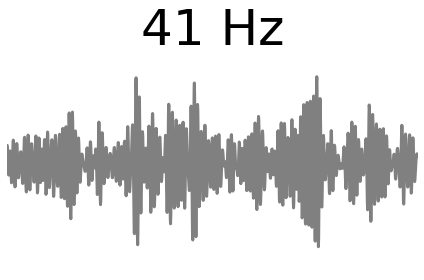

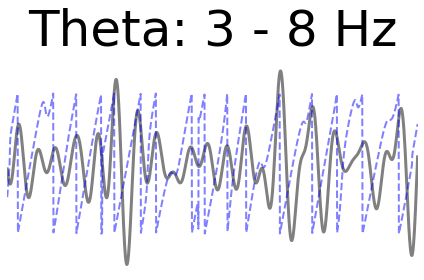

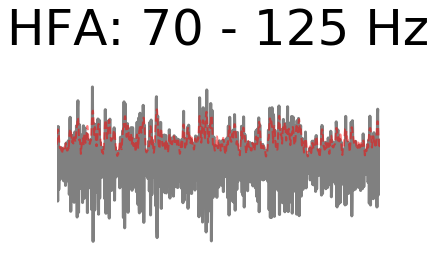

In [2]:
# Illustrate wavelet analysis

E = mm.Electrode(uElbl = 'HUP087-23-24')

#E = mm.Electrode(uElbl = 'HUP087-62-63')

# choose a trial
t = 30
ms_start = 1000
ms_duration = 3000
xval_samp = np.arange(E.ms_to_samples(ms_start),E.ms_to_samples(ms_start+ms_duration)).astype('int')
#print(xval_samp)

# plot Raw EEG
eeg = E.elec_dict['subjEEG']
plt.figure()
ax= plt.subplot(111)
plt.plot(np.linspace(ms_start,ms_start+ms_duration,len(xval_samp)),\
         eeg[t,xval_samp],linewidth = 3,color = '0.5')
ax.set_xlabel('Time (3 seconds)',fontsize=30)
ax.set_ylabel('Voltage',fontsize=30,position=(-.5,.5))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
save_fig('methods_rawEEG')

# plot select wavelets
fRange = (3,200)
numfreqs = 25
phs,logpow,wavecomp= E. eeg2wave(eeg,fRange=fRange,numfreqs=numfreqs,numcycles=6)
myfreqs = np.logspace(np.log10(fRange[0]), np.log10(fRange[1]),num=numfreqs)

# freq 1
plt.figure()
ax = plt.subplot(111)
f = 0
plt.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),wavecomp[f,xval_samp,t],\
         linewidth=3,color = '0.5')
ax.set_title(str(myfreqs[f].astype('int'))+' Hz',fontsize = 50)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
save_fig('methods_wave1')

plt.figure()
ax = plt.subplot(111)
f = 10
plt.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),wavecomp[f,xval_samp,t],\
         linewidth=3,color = '0.5')
ax.set_title(str(myfreqs[f].astype('int'))+' Hz',fontsize = 50)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
save_fig('methods_wave2')

plt.figure()
ax = plt.subplot(111)
f = 15
plt.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),wavecomp[f,xval_samp,t],\
         linewidth=3,color = '0.5')
ax.set_title(str(myfreqs[f].astype('int'))+' Hz',fontsize = 50)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
save_fig('methods_wave3')
#print(wavecomp[0,xval_samp,t].shape)



# theta
fRange = (3,8)
numfreqs = 6
phs,logpow,wavecomp= E. eeg2wave(eeg,fRange=fRange,numfreqs=numfreqs,numcycles=6)
myfreqs = np.logspace(np.log10(fRange[0]), np.log10(fRange[1]),num=numfreqs)

f=plt.figure()
ax = plt.subplot(111)
ax.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),np.nanmean(wavecomp[:,xval_samp,t],axis=0),\
         linewidth=3,color = '0.5')
ax.set_title('Theta: 3 - 8 Hz',fontsize = 50)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2 = ax.twinx()
ax2.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),(circ.mean(phs[:,xval_samp,t],axis=0)),\
         linewidth=2,color = 'b',linestyle='dashed',alpha=0.5)
ax2.set_ylim(np.deg2rad(-100),np.deg2rad(460))
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.axis('tight')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
f.tight_layout()
save_fig('methods_theta')

# HFA

fRange = (70,125)
numfreqs = 6
phs,logpow,wavecomp= E. eeg2wave(eeg,fRange=fRange,numfreqs=numfreqs,numcycles=6)
myfreqs = np.logspace(np.log10(fRange[0]), np.log10(fRange[1]),num=numfreqs)


plt.figure()
ax = plt.subplot(111)
plt.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),np.nanmean(wavecomp[:,xval_samp,t],axis=0),\
         linewidth=3,color = '0.5')
plt.plot(np.linspace(ms_start,ms_start+ms_duration,\
                     len(xval_samp)),np.exp(np.nanmean(logpow[:,xval_samp,t],axis=0)),\
         linewidth=2,color = 'r',linestyle='dashed',alpha=0.5)
ax.set_title('HFA: 70 - 125 Hz',fontsize = 50)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
save_fig('methods_hfa')


### Figure 2. High frequency activity identifies distinct neural response functions that are distributed throughout the brain
[] illustrate HFA (70-125 Hz) extraction for a single trial</br>
[x] 2d distribution of task-evoked HFA </br>
[x] group related activation function for each group</br>
[x] example electrodes for each cluster</br>
[x] brain plots for each group</br>
[x] anatomical distribution for each group</br>
[x] effector selectivity for each group</br>

In [3]:
# antomy of HFA clusters
def plotHFARegionAnat(thisClus,ax=None,title = 'thisCluster'):
    numInClus = np.sum(groupDf['clusId'].to_numpy()==thisClus)
    thisClus_freq = numInClus/len(groupDf)

    # plot by region
    if ax == None:
        f = plt.figure(figsize=(5,5))
        ax = plt.subplot(111)
        
    counts_numInReg = []
    counts_thisClusInReg = []

    for r in roi_list:

        numInReg = len(groupDf.query('ROI==@r'))
        numThisClusInReg = np.count_nonzero(groupDf.query('ROI==@r')['clusId'].to_numpy()==thisClus)

        # plot bar for this cluster
        #clus_prct =100*(numThisClusInReg/numInClus)
        clus_prct =100*(numThisClusInReg/numInReg)
        width = 0.6
        plt.bar(roi_list.index(r),clus_prct,color='0.5',edgecolor='k',width = width)
        ax.text(roi_list.index(r)-.2,2,str(numThisClusInReg)+'/'+str(numInReg),rotation=90,fontsize=18)

        # append counts lists
        counts_numInReg.append(numInReg)
        counts_thisClusInReg.append(numThisClusInReg)

    ax.set_xticks(np.arange(0,len(roi_list)))
    ax.set_xticklabels(roi_list,fontsize=20,rotation=90);
    #ax.set_xlabel('Region',fontsize=20)
    ax.set_ylabel('% of electrodes in region',fontsize=20)
    ax.set_title(title,fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
    ax.hlines(100*thisClus_freq,ax.get_xlim()[0],ax.get_xlim()[1],linestyle='dashed',alpha = 0.5)
    #plt.legend((ax.findobj()[0],ax.findobj()[1]),('theta (3-8 Hz)','beta (12-30 Hz)'))    
    plt.tight_layout()
    print('\n')
    print('Cluster '+str(thisClus))
    chisq,p = stats.chisquare(f_obs=counts_thisClusInReg, \
                              f_exp=np.array(counts_numInReg)*thisClus_freq)
    print('observed:  ',counts_thisClusInReg)
    print('expected:  ',np.array(counts_numInReg)*thisClus_freq)
    print('chisq',np.round(chisq,3),np.round(p,4))
# antomy of HFA clusters
def plotHFAEffSel(ax=None,p_thresh = 0.05):
    numEffSel_i = np.sum(groupDf['instructionSelective'].to_numpy()<=p_thresh)
    numEffSel_i_freq = numEffSel_i/len(groupDf)
    
    
    numEffSel_m = np.sum(groupDf['effectorSelective'].to_numpy()<=p_thresh)
    numEffSel_m_freq = numEffSel_m/len(groupDf)

    # plot by region
    if ax == None:
        f = plt.figure(figsize=(5,5))
        ax = plt.subplot(111)
        
    counts_numInClus = []
    counts_effSelInClus = []
    counts_instSelInClus = []
    
    clus_list = list(np.unique(groupDf['clusId'].to_numpy()))

    for c in clus_list:

        numInClus = len(groupDf.query('clusId==@c'))
        numInstSelInClus = np.count_nonzero(groupDf.query('clusId==@c')['instructionSelective'].to_numpy()\
                                           <=p_thresh)
        numEffSelInClus = np.count_nonzero(groupDf.query('clusId==@c')['effectorSelective'].to_numpy()\
                                           <=p_thresh)
        # plot bar for this cluster
        clus_prct_i =100*(numInstSelInClus/numInClus)
        clus_prct_m =100*(numEffSelInClus/numInClus)
        width = 0.4
        plt.bar(c-0.25,clus_prct_i,color='C0',edgecolor='k',width = width)
        plt.bar(c+0.25,clus_prct_m,color='C1',edgecolor='k',width = width)

        ax.text(c-0.25-.125,7.5,str(numInstSelInClus)+'/'+str(numInClus),rotation=90,fontsize=18)
        ax.text(c+0.25-.125,7.5,str(numEffSelInClus)+'/'+str(numInClus),rotation=90,fontsize=18)

        # append counts lists
        counts_numInClus.append(numInClus)
        counts_effSelInClus.append(numEffSelInClus)
        counts_instSelInClus.append(numInstSelInClus)

    ax.set_xticks(clus_list)
    ax.set_xticklabels(['HFA\n inst','HFA\n move','HFA\n dec','HFA\n null'],fontsize=20,rotation=0);
    #ax.set_xlabel('evHFA group',fontsize=20)
    ax.set_ylabel('% of electrodes',fontsize=20)
    
    ax.hlines(100*p_thresh,ax.get_xlim()[0],ax.get_xlim()[1],linestyle='dashed',alpha = 0.5)
    plt.legend((ax.findobj()[1],ax.findobj()[2]),\
               ('instruction \n selective','movement \n selective'),fontsize=14)    
    plt.tight_layout()
    print('\n')
    print('Eff Sel')
    chisq,p = stats.chisquare(f_obs=counts_effSelInClus, \
                              f_exp=np.array(counts_numInClus)*numEffSel_m_freq)
    print('observed:  ',counts_effSelInClus)
    print('expected:  ',np.array(counts_numInClus)*p_thresh)
    print('chisq',np.round(chisq,3),np.round(p,4)) 
    print('\n')
    print('Inst Sel')
    chisq,p = stats.chisquare(f_obs=counts_instSelInClus, \
                              f_exp=np.array(counts_numInClus)*numEffSel_i_freq)
    print('observed:  ',counts_instSelInClus)
    print('expected:  ',np.array(counts_numInClus)*p_thresh)
    print('chisq',np.round(chisq,3),np.round(p,4)) 



Cluster 1
observed:   [9, 19, 4, 15, 4]
expected:   [13.25       15.27430556  3.12847222 17.48263889  2.94444444]
chisq 3.246 0.5176


Cluster 2
observed:   [8, 21, 1, 4, 0]
expected:   [ 8.5         9.79861111  2.00694444 11.21527778  1.88888889]
chisq 19.87 0.0005


Cluster 3
observed:   [9, 10, 5, 27, 0]
expected:   [13.5    15.5625  3.1875 17.8125  3.    ]
chisq 12.258 0.0155


Cluster 4
observed:   [46, 33, 7, 49, 12]
expected:   [36.75       42.36458333  8.67708333 48.48958333  8.16666667]
chisq 6.527 0.1631


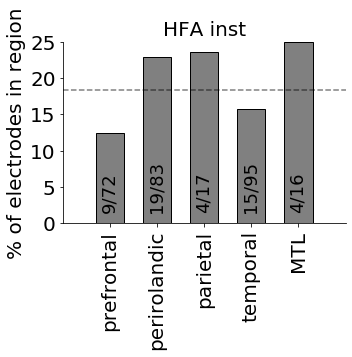

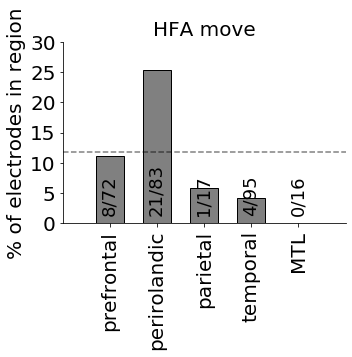

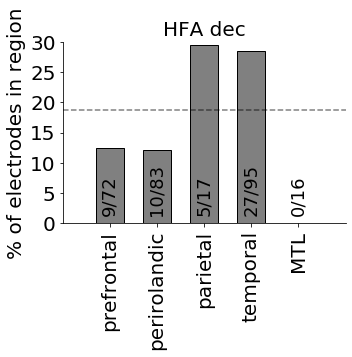

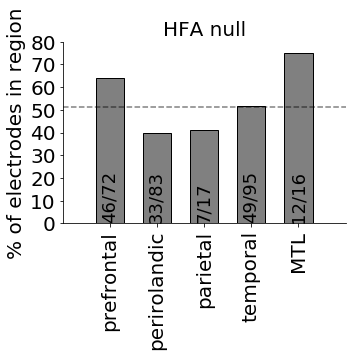

In [4]:
# print HFA cluster anatomy
plotHFARegionAnat(thisClus=1,title='HFA inst')
save_fig('hfaAnat_clus1')
plotHFARegionAnat(thisClus=2,title='HFA move')
save_fig('hfaAnat_clus2')
plotHFARegionAnat(thisClus=3,title='HFA dec')
save_fig('hfaAnat_clus3')
plotHFARegionAnat(thisClus=4,title='HFA null')
save_fig('hfaAnat_clus4')



Eff Sel
observed:   [12, 16, 3, 21]
expected:   [2.65 1.7  2.7  7.35]
chisq 22.288 0.0001


Inst Sel
observed:   [3, 1, 3, 10]
expected:   [2.65 1.7  2.7  7.35]
chisq 0.723 0.8677
147


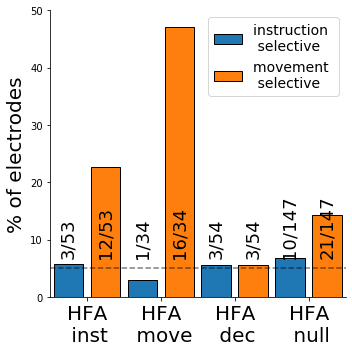

In [49]:
# print HFA cluster anatomy
plotHFAEffSel()
save_fig('HFAeffectorSel')
print(len(groupDf.query('clusId==4')))

### Figure 3. Theta oscillations are a global process that occur independently of evoked high frequency activity
[] illustrate FOOOF to identify oscillations</br> 
[x] Overall distribution of LFO across all electrodes (freq of slowest oscillation)
[x] Bar plot showing probability of observing FOOOF related theta across the groups and across regions</br>
[x] group related theta for each group</br>
[X] correlation between evoked KFinstruction-related theta power and HFA, and movement-related theta power and HFA [x] residualized on LFA </br>



In [5]:
%%capture
# plot all peaks to assess overall distribution of theta peaks
G = mm.Group(subj_list=None,clusId_list=None,roi_list = None)
G.calc_lfo(ev_type=None,offset_ms = 0, duration_ms = 5000)

# calc whether each electrode has any peak
has_no_peak = (np.stack(G.groupDf_lfo['theta'].to_numpy())[:,0])
has_no_peak[np.isnan(has_no_peak)==False] = 0
has_no_peak[np.isnan(has_no_peak)==True] = 1
has_no_peak_freq = np.array((np.sum(has_no_peak)\
                                /len(has_no_peak))).astype('float')

# calc whether each electrode has a theta peak
has_theta_peak = (np.stack(G.groupDf_lfo['theta'].to_numpy())[:,0])
has_theta_peak[np.isnan(has_theta_peak)] = 0
has_theta_peak[has_theta_peak>0]=1
has_theta_peak_freq = np.array((np.sum(has_theta_peak)\
                                /len(has_theta_peak))).astype('float')

#print(has_theta_peak)

# calc whether each electrode has a theta peak
has_beta_peak = (np.stack(G.groupDf_lfo['beta'].to_numpy())[:,0])
has_beta_peak[np.isnan(has_beta_peak)] = 0
has_beta_peak[has_beta_peak>0]=1
has_beta_peak_freq = np.array((np.sum(has_beta_peak)\
                                /len(has_beta_peak))).astype('float')

/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ashwinramayya/anaconda3/envs/environment_name/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


R-Sq of FOOOF fits
mean: 0.995
std: 0.012


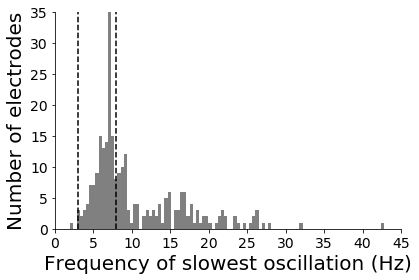

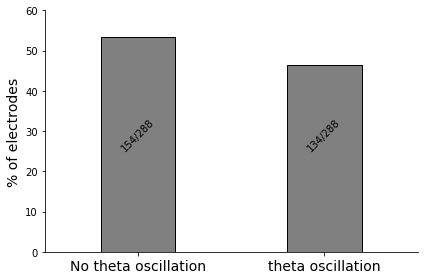

In [6]:
f = plt.figure()
ax = plt.subplot(111)
G.plot_lfo_peaks(ax = ax,lfo_only=True,bins = 100)
ax.set_xlabel('Frequency of slowest oscillation (Hz)',fontsize=20)
ax.set_ylabel('Number of electrodes',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
ax.set_title('')
ax.vlines([3,8],ax.get_ylim()[0],ax.get_ylim()[1],linestyle='dashed',alpha = 1)
save_fig('LFO_dist')


# plot electrodes with no oscillation
f = plt.figure()
ax = plt.subplot(111)
plt.bar((0,1),(100*has_no_peak_freq,\
               100*has_theta_peak_freq),color='0.5',
        edgecolor='k',width =0.4)
ax.text(-.1,25,str(np.count_nonzero(has_no_peak))+'/'+str(len(has_no_peak)),rotation=45)
ax.text(.9,25,str(np.count_nonzero(has_theta_peak))+'/'+str(len(has_theta_peak)),rotation=45)

ax.set_xlim([-.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['No theta oscillation','theta oscillation'],fontsize=14)
ax.set_ylabel('% of electrodes',fontsize=14)
save_fig('theta_detection_summary')

# plot dist of R-squared values
print('R-Sq of FOOOF fits')
print('mean:',np.round(np.mean(G.groupDf_lfo['rsq'].to_numpy()),3))
print('std:',np.round(np.std(G.groupDf_lfo['rsq'].to_numpy()),3))

In [7]:
len(G.groupDf_lfo.iloc[has_theta_peak==1].query('subj=="HUP112"'))

7



Theta
observed:   [23, 15, 25, 71]
expected:   [24.65972222 15.81944444 25.125      68.39583333]
chisq 0.254 0.9684


Beta
observed:   [37, 26, 32, 102]
expected:   [ 36.25347222  23.25694444  36.9375     100.55208333]
chisq 1.02 0.7965


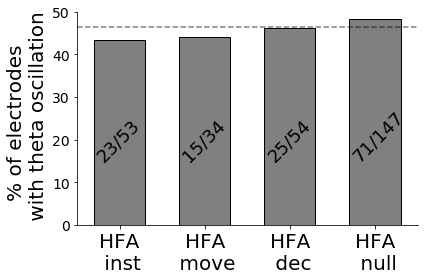

In [8]:
# Bar plot showing probability of observing FOOOF related theta across the groups</br>
# plot by cluster
f = plt.figure()
ax = plt.subplot(111)
clusId_list = np.unique(G.groupDf_lfo['clusId'])
counts_numInClus = []
counts_thetaInClus = []
counts_betaInClus = []
for c in clusId_list:
    thisClus_bool = G.groupDf_lfo.eval('clusId==@c').to_numpy()
    numInClus = np.count_nonzero(thisClus_bool)
    numThetaInClus = np.count_nonzero(has_theta_peak[thisClus_bool])
    numBetaInClus = np.count_nonzero(has_beta_peak[thisClus_bool])
    
    # plot bar for this cluster
    theta_prct =100*(numThetaInClus/numInClus)
    beta_prct =100*(numBetaInClus/numInClus)
    width = 0.6
    plt.bar(c,theta_prct,color='0.5',edgecolor='k',width = width,label='theta')
    ax.text(c-.3,15,str(numThetaInClus)+'/'+str(numInClus),rotation=45, fontsize=18)

    #plt.bar(c-.25,theta_prct,color='C0',edgecolor='k',width = width,label='theta')
    #plt.bar(c+.25,beta_prct,color='C1',edgecolor='k',width = width,label='beta')
    
    # append counts lists
    counts_numInClus.append(numInClus)
    counts_thetaInClus.append(numThetaInClus)
    counts_betaInClus.append(numBetaInClus)

ax.set_xticks(clusId_list)
ax.set_xticklabels(['HFA\n inst','HFA\n move','HFA\n dec','HFA\n null'],fontsize=20,rotation =0);
ax.hlines(100*has_theta_peak_freq,ax.get_xlim()[0],ax.get_xlim()[1],linestyle='dashed',alpha = 0.5)
#ax.set_xlabel('electrode group',fontsize=20)
ax.set_ylabel('% of electrodes \n with theta oscillation',fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
#plt.legend((ax.findobj()[0],ax.findobj()[1]),('theta (3-8 Hz)','beta (12-30 Hz)'))
plt.tight_layout()
save_fig('oscillationsByClus')

print('\n')
print('Theta')
chisq,p = stats.chisquare(f_obs=counts_thetaInClus, \
                          f_exp=counts_numInClus*has_theta_peak_freq)
print('observed:  ',counts_thetaInClus)
print('expected:  ',counts_numInClus*has_theta_peak_freq)
print('chisq',np.round(chisq,3),np.round(p,4))

print('\n')
print('Beta')
chisq,p = stats.chisquare(f_obs=counts_betaInClus, \
                          f_exp=counts_numInClus*has_beta_peak_freq)
print('observed:  ',counts_betaInClus)
print('expected:  ',counts_numInClus*has_beta_peak_freq)
print('chisq',np.round(chisq,3),np.round(p,4))



Theta
observed:   [37, 43, 10, 37, 6]
expected:   [33.5        38.61805556  7.90972222 44.20138889  7.44444444]
chisq 2.869 0.58


Beta
observed:   [59, 64, 13, 50, 10]
expected:   [49.25       56.77430556 11.62847222 64.98263889 10.94444444]
chisq 6.548 0.1618


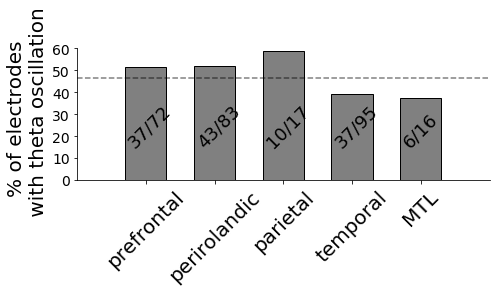

In [9]:
# plot by region
f = plt.figure(figsize=(7,4))
ax = plt.subplot(111)
counts_numInReg = []
counts_thetaInReg = []
counts_betaInReg = []
for r in roi_list:
    
    thisReg_bool = G.groupDf_lfo.eval('ROI==@r').to_numpy()
    numInReg = np.count_nonzero(thisReg_bool)
    numThetaInReg = np.count_nonzero(has_theta_peak[thisReg_bool])
    numBetaInReg = np.count_nonzero(has_beta_peak[thisReg_bool])
    
    # plot bar for this cluster
    theta_prct =100*(numThetaInReg/numInReg)
    beta_prct =100*(numBetaInReg/numInReg)
    width = 0.6
    plt.bar(roi_list.index(r),theta_prct,color='0.5',edgecolor='k',width = width)
    ax.text(roi_list.index(r)-.3,15,str(numThetaInReg)+'/'+str(numInReg),rotation=45,fontsize=18)
    #plt.bar(roi_list.index(r)-.25,theta_prct,color='C0',edgecolor='k',width = width)
    #plt.bar(roi_list.index(r)+.25,beta_prct,color='C1',edgecolor='k',width = width)
    
    # append counts lists
    counts_numInReg.append(numInReg)
    counts_thetaInReg.append(numThetaInReg)
    counts_betaInReg.append(numBetaInReg)

ax.set_xticks(np.arange(0,len(roi_list)))
ax.set_xticklabels(roi_list,fontsize=20,rotation=45);
#ax.set_xlabel('Region',fontsize=20)
ax.set_ylabel('% of electrodes \n with theta oscillation',fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
ax.hlines(100*has_theta_peak_freq,ax.get_xlim()[0],ax.get_xlim()[1],linestyle='dashed',alpha = 0.5)
#plt.legend((ax.findobj()[0],ax.findobj()[1]),('theta (3-8 Hz)','beta (12-30 Hz)'))    
plt.tight_layout()
save_fig('oscillationsByReg')

print('\n')
print('Theta')
chisq,p = stats.chisquare(f_obs=counts_thetaInReg, \
                          f_exp=counts_numInReg*has_theta_peak_freq)
print('observed:  ',counts_thetaInReg)
print('expected:  ',counts_numInReg*has_theta_peak_freq)
print('chisq',np.round(chisq,3),np.round(p,4))

print('\n')
print('Beta')
chisq,p = stats.chisquare(f_obs=counts_betaInReg, \
                          f_exp=counts_numInReg*has_beta_peak_freq)
print('observed:  ',counts_betaInReg)
print('expected:  ',counts_numInReg*has_beta_peak_freq)
print('chisq',np.round(chisq,3),np.round(p,4))

### Figure 4: Relating HFA to LFA and theta power

In [10]:
# Correlation between task evoked HFA, LFA and theta post-movement
reg_move_lfa_theta = smf.ols('postMove_HFA ~ postMove_LFA + postMove_theta ',\
                             data = G.groupDf_lfo).fit()
reg_move_lfa = smf.ols('postMove_HFA ~ postMove_LFA',\
                       data = G.groupDf_lfo).fit()


reg_inst_lfa_theta = smf.ols('postInst_HFA ~ postInst_LFA + postInst_theta ',\
                             data = G.groupDf_lfo).fit()
reg_inst_lfa = smf.ols('postInst_HFA ~ postInst_LFA',\
                       data = G.groupDf_lfo).fit()

def plotCorr(x,y):
    # SOC vs. ZRRT
    plt.figure()
    plt.scatter(x,y,c='0.5',edgecolor = 'k',alpha =0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot(x, intercept + (slope*np.array(x)), 'r', linestyle='dashed',alpha=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.title('r = '+str(np.round(r_value,2))+' p ='+str(np.round(p_value,2)))


pval_list = list(reg_inst_lfa_theta.pvalues.to_numpy())+list(reg_move_lfa_theta.pvalues.to_numpy())
vars_list = list(reg_inst_lfa_theta.params.keys())+list(reg_move_lfa_theta.params.keys())
print(vars_list)
print(reg_inst_lfa_theta.summary())
print(reg_move_lfa_theta.summary())

['Intercept', 'postInst_LFA', 'postInst_theta', 'Intercept', 'postMove_LFA', 'postMove_theta']
                            OLS Regression Results                            
Dep. Variable:           postInst_HFA   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.419
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0129
Time:                        15:09:50   Log-Likelihood:                -779.72
No. Observations:                 288   AIC:                             1565.
Df Residuals:                     285   BIC:                             1576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [11]:
#FDR correction
from statsmodels.stats.multitest import multipletests as FDR

reject,pvals_corrected,AS,AB =  FDR(pvals = np.array(pval_list), alpha = 0.05,method = 'fdr_bh')
print(vars_list,np.round(pvals_corrected,3))

['Intercept', 'postInst_LFA', 'postInst_theta', 'Intercept', 'postMove_LFA', 'postMove_theta'] [0.043 0.631 0.433 0.29  0.002 0.648]


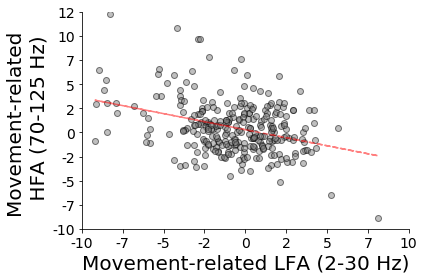

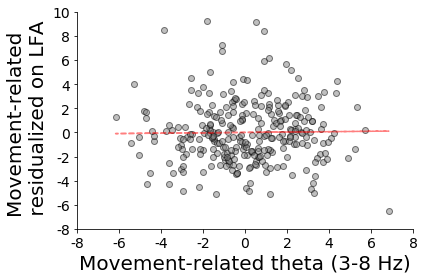

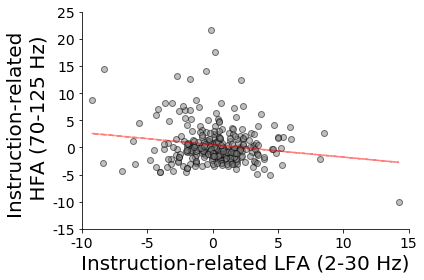

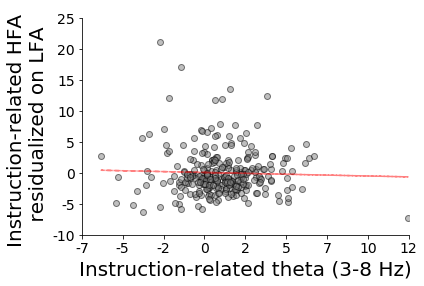

In [12]:
## MOVE
# plot LFA vs. HFA
plotCorr(G.groupDf_lfo['postMove_LFA'],G.groupDf_lfo['postMove_HFA'])
ax = plt.gca()
ax.set_xlabel('Movement-related LFA (2-30 Hz)',fontsize=20)
ax.set_ylabel('Movement-related \n HFA (70-125 Hz)',fontsize=20)
ax.set_title('')
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
save_fig('scatter_postMove_LFA_HFA')

# plot theta vs. HFA residualized on LFA
plotCorr(G.groupDf_lfo['postMove_theta'],reg_move_lfa.resid)
ax = plt.gca()
ax.set_xlabel('Movement-related theta (3-8 Hz)',fontsize=20)
ax.set_ylabel('Movement-related \n residualized on LFA',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
ax.set_title('')
save_fig('scatter_postMove_theta_HFAresid')


## INSTRUCT
# plot theta vs. HFA residualized on LFA
plotCorr(G.groupDf_lfo['postInst_LFA'],G.groupDf_lfo['postInst_HFA'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Instruction-related LFA (2-30 Hz)',fontsize=20)
ax.set_ylabel('Instruction-related \n HFA (70-125 Hz)',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
ax.set_title('')
save_fig('scatter_postInst_LFA_HFA')

# plot LFA vs. HFA residualized on LFA
plotCorr(G.groupDf_lfo['postInst_theta'],reg_inst_lfa.resid)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Instruction-related theta (3-8 Hz)',fontsize=20)
ax.set_ylabel('Instruction-related HFA \n residualized on LFA',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
ax.set_title('')
save_fig('scatter_postInst_theta_HFAresid')


### Figure 5. Theta pairwise synchrony is greater than expected by chance
[X] example illustrating pairwise within-trial theta synchrony, show null distribution </br>
[X] time course of theta pairwise synchrony throughout the task, indicate time of interest </br>
[x] Bar plot showing phase synchrony within each electrode group </br>
[x] Bar plot showing phase synchrony between pairs of electrode groups</br>
[x] Correlation between pairwise phase synchrony and mean instruction-related HFA increase </br>
[x] Correlation between pairwise phase synchrony and mean movement-related HFA increase </br>
[x] Correlation between pairwise phase synchrony and pairwise electrode distance</br>

In [14]:
%%capture
# PLOT EXAMPLE 
E = mm.Electrode(uElbl = 'HUP087-23-24')
E.calc_lfo()
O = mm.Electrode(uElbl = 'HUP087-32-33')
O.calc_lfo()
O2 = mm.Electrode(uElbl = 'HUP087-20-21')
O2.calc_lfo()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 2.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     4.5291, 315.8167, 2.8875                                     
                                                                                                  
                                       2 peaks were found:                                        
          

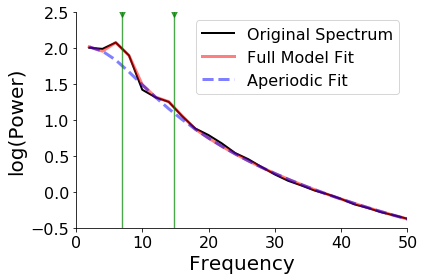

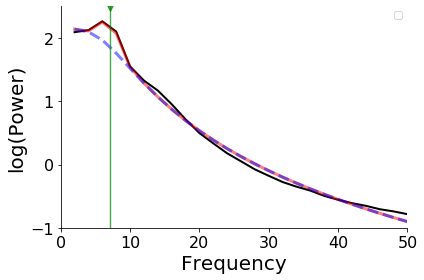

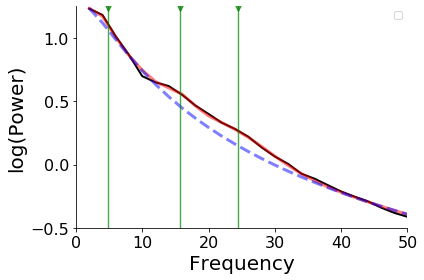

In [15]:
# plot LFO
E.plot_lfo()
ax = plt.gca()
ax.grid(False)
save_fig(fname = 'eg_LFO_HUP087-23-24')


O.plot_lfo()
ax = plt.gca()
ax.grid(False)
ax.legend('')
save_fig(fname = 'eg_LFO_HUP087-32-33')


O2.plot_lfo()
ax = plt.gca()
ax.grid(False)
ax.legend('')
save_fig(fname = 'eg_LFO_HUP087-20-21')

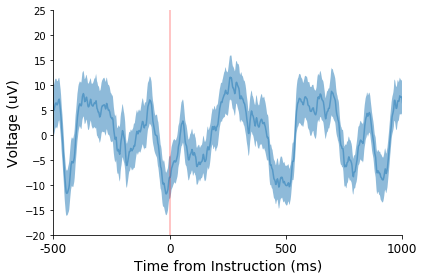

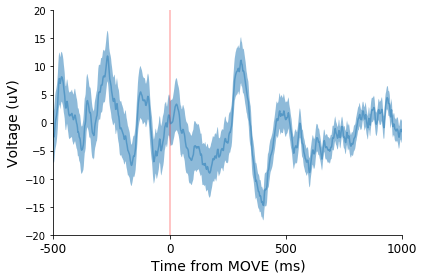

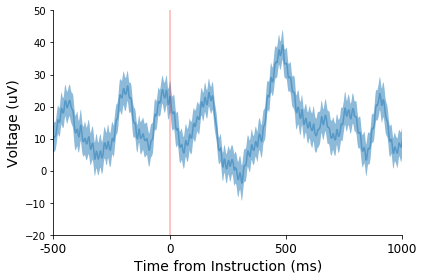

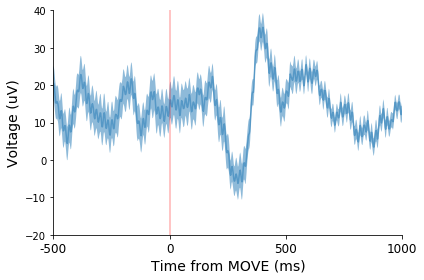

In [16]:
# PLOT ERPS for example
# SELF
E.calc_erp(ev_type='INSTRUCT',ev_item=None,apply_gauss_smoothing=False)
#E.plot_erp_byType(ev_item = None)
E.plot_erp()
ax=plt.gca()
ax.vlines(x=0,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],alpha = 0.3,color='r')
ax.set_xlabel('Time from Instruction (ms)',fontsize=14)
ax.set_ylabel('Voltage (uV)',fontsize=14)
save_fig('eg_erp_instruct_HUP087-23-24')

E.calc_erp(ev_type='MOVE',ev_item=None,apply_gauss_smoothing=False)
#E.plot_erp_byType(ev_item = None)
E.plot_erp()
ax=plt.gca()
ax.vlines(x=0,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],alpha = 0.3,color='r')
ax.set_xlabel('Time from MOVE (ms)',fontsize=14)
ax.set_ylabel('Voltage (uV)',fontsize=14)
save_fig('eg_erp_move_HUP087-23-24')


# OTHER
O.calc_erp(ev_type='INSTRUCT',ev_item=None,apply_gauss_smoothing=False)
#O.plot_erp_byType(ev_item = None)
O.plot_erp()
ax=plt.gca()
ax.vlines(x=0,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],alpha = 0.3,color='r')
ax.set_xlabel('Time from Instruction (ms)',fontsize=14)
ax.set_ylabel('Voltage (uV)',fontsize=14)
save_fig('eg_erp_instruct_HUP087-32-33')

O.calc_erp(ev_type='MOVE',ev_item=None,apply_gauss_smoothing=False)
#O.plot_erp_byType(ev_item = None)
O.plot_erp()
ax=plt.gca()
ax.vlines(x=0,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],alpha = 0.3,color='r')
ax.set_xlabel('Time from MOVE (ms)',fontsize=14)
ax.set_ylabel('Voltage (uV)',fontsize=14)
save_fig('eg_erp_move_HUP087-32-33')

In [17]:
%%capture
# calc sync x time for INSTRUCT
fRange = (3,8)
other = O
ev_type = 'INSTRUCT'
ev_item = None
method = 'wave'
wave_numfreqs = 6
wave_numcycles = 5
offset_ms_list = np.linspace(-1000,1000,30)
duration_ms = 1000
n_iters = 10000

E.calc_phaseSync_xTime(other = other,\
                       fRange=fRange,\
                       ev_type = ev_type, \
                       ev_item = ev_item, \
                       method = method,\
                       wave_numfreqs = wave_numfreqs, \
                       wave_numcycles = wave_numcycles,\
                       offset_ms_list=offset_ms_list, \
                       duration_ms=duration_ms,n_iters=n_iters)

t vs. null = 15.0, p = 0.0


/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1277: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)
/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1282: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)


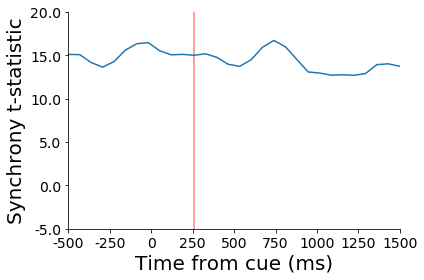

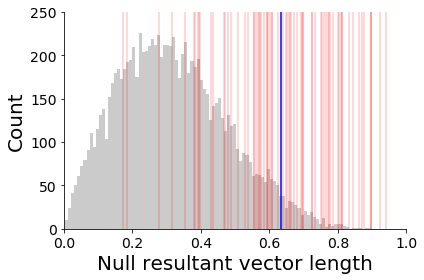

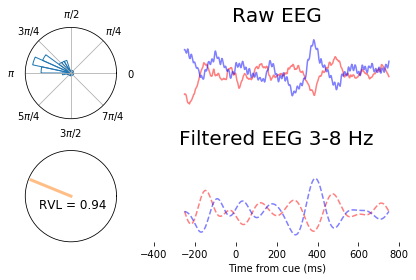

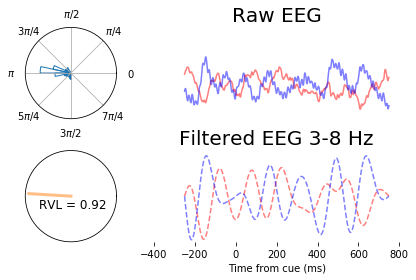

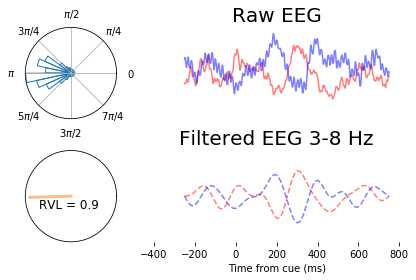

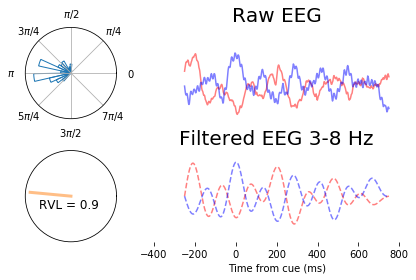

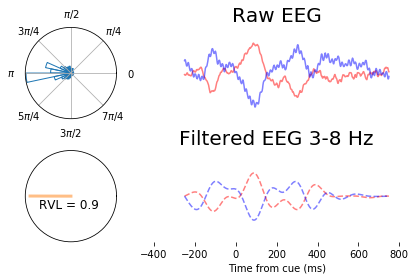

In [18]:
E.plot_phaseSync_xTime_summary(offset_of_interest_ms = -250,\
                               n_clips = 5,n_phs_bins=30,\
                               savefig = True, figdir=fig_dir,\
                               fname='eg_syncSummary_instruct',yL=(-5,20))

In [19]:
%%capture
# calc sync x time for INSTRUCT -- SECOND PAIR
fRange = (3,8)
other = O2
ev_type = 'INSTRUCT'
ev_item = None
method = 'wave'
wave_numfreqs = 6
wave_numcycles = 5
offset_ms_list = np.linspace(-1000,1000,30)
duration_ms = 1000
n_iters = 1000

E.calc_phaseSync_xTime(other = other,\
                       fRange=fRange,\
                       ev_type = ev_type, \
                       ev_item = ev_item, \
                       method = method,\
                       wave_numfreqs = wave_numfreqs, \
                       wave_numcycles = wave_numcycles,\
                       offset_ms_list=offset_ms_list, \
                       duration_ms=duration_ms,n_iters=n_iters)

t vs. null = 1.25, p = 0.217


/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1277: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)
/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1282: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)


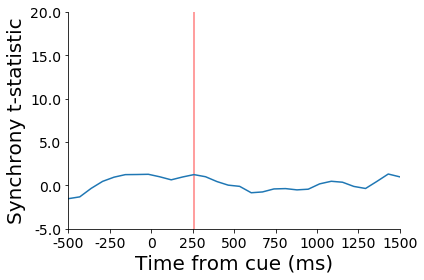

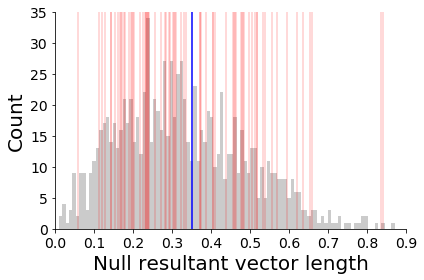

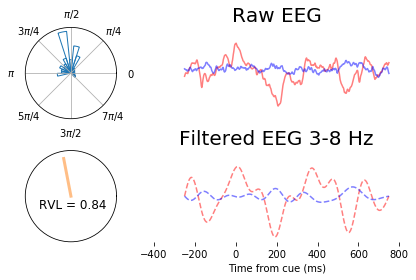

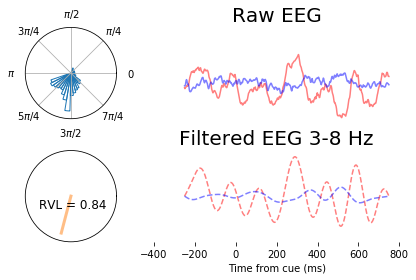

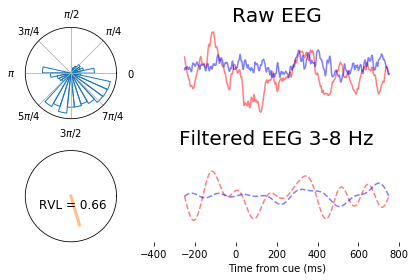

In [20]:
E.plot_phaseSync_xTime_summary(offset_of_interest_ms = -250,\
                               n_clips = 3,n_phs_bins=30,\
                               savefig = True, figdir=fig_dir,\
                               fname='eg_syncSummary_instruct_vs2021',yL=(-5,20))

In [21]:
%%capture
# calc and plot sync x time for MOVE
fRange = (3,8)
other = O
ev_type = 'INSTRUCT'
ev_item = None
method = 'wave'
wave_numfreqs = 6
wave_numcycles = 5
offset_ms_list = np.linspace(-1000,1000,30)
duration_ms = 1000
n_iters = 1000




E.calc_phaseSync_xTime(other = other,\
                       fRange=fRange,\
                       ev_type = 'MOVE', \
                       ev_item = ev_item, \
                       method = method,\
                       wave_numfreqs = wave_numfreqs, \
                       wave_numcycles = wave_numcycles,\
                       offset_ms_list=offset_ms_list, \
                       duration_ms=duration_ms,n_iters=n_iters)

t vs. null = 10.83, p = 0.0


/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1277: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)
/Users/ashwinramayya/Dropbox/neurosurgery_research/jupyter/motormap/mm_func_v2.py:1282: RuntimeWarning: filter_length (845) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  method='fir',verbose=False)


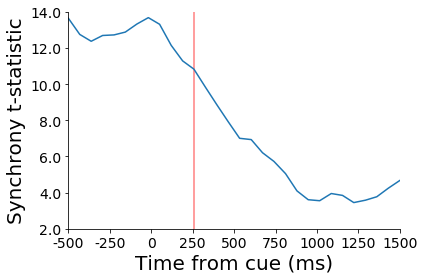

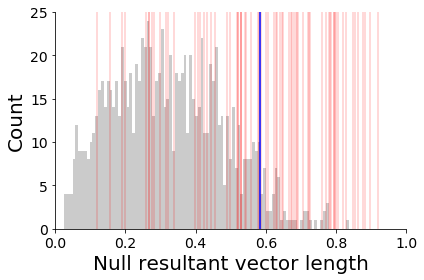

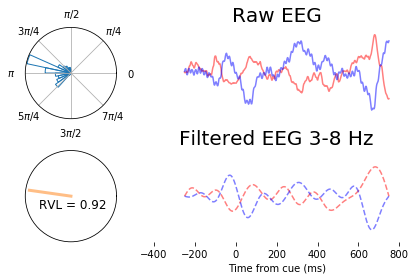

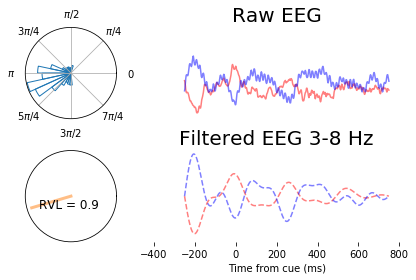

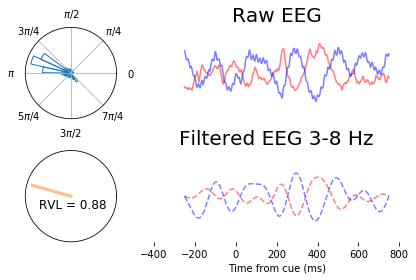

In [22]:
E.plot_phaseSync_xTime_summary(offset_of_interest_ms = -250,\
                               n_clips = 3,n_phs_bins=30,\
                               savefig = True, figdir=fig_dir,\
                               fname='eg_syncSummary_move')

In [23]:
%%capture

# GROUP SYNCHRONY DATA - SPECIFY EV TYPE !!!
G_i= mm.Group(subj_list=None,clusId_list=None,roi_list = None)
G_m= mm.Group(subj_list=None,clusId_list=None,roi_list = None)

# params
fRange = (3,8)
#ev_type = 'MOVE'
ev_item = None
method = 'wave'
wave_numfreqs = 6
wave_numcycles = 5
offset_ms_list = np.linspace(-1000,1000,10)
duration_ms = 1000
n_iters = 1000

# SPECIFY offset_of_interest_ms (used throughout the analysis)
offset_of_interest_ms = -250


G_i.calc_phaseSync_xTime(fRange=fRange,\
                       ev_type = 'INSTRUCT',\
                       ev_item = ev_item,\
                       method = method,\
                       wave_numfreqs = wave_numfreqs,\
                       wave_numcycles = wave_numcycles,\
                       offset_ms_list=offset_ms_list,\
                       duration_ms=duration_ms,\
                       n_iters=n_iters)
G_m.calc_phaseSync_xTime(fRange=fRange,\
                       ev_type = 'MOVE',\
                       ev_item = ev_item,\
                       method = method,\
                       wave_numfreqs = wave_numfreqs,\
                       wave_numcycles = wave_numcycles,\
                       offset_ms_list=offset_ms_list,\
                       duration_ms=duration_ms,\
                       n_iters=n_iters)


# get a copy of phase df for further analyses
phsdf_i = G_i.groupDf_phaseSync_xTime.copy()
phsdf_m = G_m.groupDf_phaseSync_xTime.copy()


# query by has_theta_peak
query_str = '(has_theta_other==True) & (has_theta_self==True)'
#query_str = '(has_theta_other==False) & (has_theta_self==False)'
phsdf_i = phsdf_i.query(query_str)
phsdf_m = phsdf_m.query(query_str)

In [24]:
# update clustering data ineach of these dataframes
# with current matlab-generated data stored in groupDf
# Only need to run this if there is a mismatch between 
# saved pairwise phase data and current instance of groupDf


phsdf_i = G_i.updateClusDataInGroupPhsDf(phsdf_i)
phsdf_m = G_m.updateClusDataInGroupPhsDf(phsdf_m)




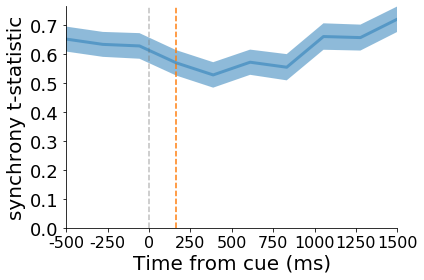

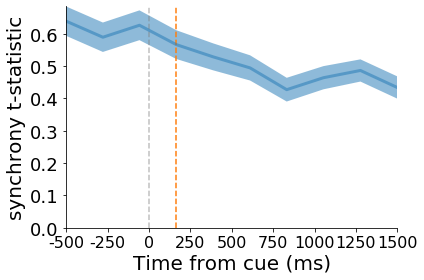

In [25]:
# plot RVL_tvsNull_vs time
G_i.plot_phaseSync_xTime_rvl_tstat_ByTime(phsdf = phsdf_i,offset_of_interest_ms=offset_of_interest_ms)
ax =plt.gca()
ax.set_ylabel('synchrony t-statistic',fontsize=20)
ax.set_xlabel('Time from cue (ms)',fontsize=20)
ax.set_title('')
ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=18)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=16)
save_fig('grp_instruct_rvl_tstatByTime')

G_m.plot_phaseSync_xTime_rvl_tstat_ByTime(phsdf = phsdf_m,offset_of_interest_ms=offset_of_interest_ms)
ax =plt.gca()
ax.set_ylabel('synchrony t-statistic',fontsize=20)
ax.set_xlabel('Time from cue (ms)',fontsize=20)
ax.set_title('')
ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=18)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=16)
save_fig('grp_move_rvl_tstatByTime')

t inst (removing outliers)= 12.99 p = 0.0
t move (removing outliers)= 12.74 p = 0.0
t inst (by subject)= 4.42 p = 0.0022
9
t move (by subject)= 2.5 p = 0.037
9
paired t  (by subject)= 0.29 p = 0.0287
0.7198839821768911 0.028749418626263845


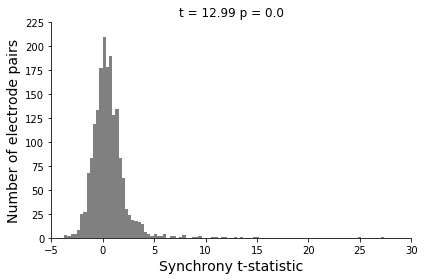

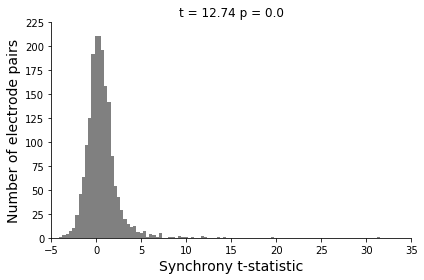

In [26]:
# plot RVL_tvsNull_vs time for offset of interest
rvl_tstats_i =G_i.plot_phaseSync_xTime_tstat_dist(phsdf = phsdf_i,\
                                ax= None,offset_of_interest_ms = offset_of_interest_ms)
ax = plt.gca()
ax.set_ylabel('Number of electrode pairs',fontsize=14)
ax.set_xlabel('Synchrony t-statistic',fontsize=14)
save_fig('grp_inst_rvl_tstat_dist')

rvl_tstats_m =G_m.plot_phaseSync_xTime_tstat_dist(phsdf = phsdf_m,\
                                ax= None,offset_of_interest_ms = offset_of_interest_ms)
ax = plt.gca()
ax.set_ylabel('Number of electrode pairs',fontsize=14)
ax.set_xlabel('Synchrony t-statistic',fontsize=14)
save_fig('grp_move_rvl_tstat_dist')


# initialize pval_list to hold group level stats
pval_list = []


# rvl_t vs. 0
t,p =stats.ttest_1samp(rvl_tstats_i,0)
pval_list.append(p)

t,p =stats.ttest_1samp(rvl_tstats_m,0)
pval_list.append(p)



# Remove outliers
t,p =stats.ttest_1samp(rvl_tstats_i,0)
print('t inst (removing outliers)= '+str(np.round(t,2))+' p = '+str(np.round(p,4)))

t,p =stats.ttest_1samp(rvl_tstats_m,0)
print('t move (removing outliers)= '+str(np.round(t,2))+' p = '+str(np.round(p,4)))



#collapse by subject
subj_list = phsdf_i['subj'].to_numpy() 
rvl_tstats_collapsed_i = \
G_i.collapseBySubj_1d(subj_list=subj_list,x=rvl_tstats_i)
t,p =stats.ttest_1samp(rvl_tstats_collapsed_i,0)
print('t inst (by subject)= '+str(np.round(t,2))+' p = '+str(np.round(p,4)))
print(len(rvl_tstats_collapsed_i))

subj_list = phsdf_m['subj'].to_numpy() 
rvl_tstats_collapsed_m = \
G_i.collapseBySubj_1d(subj_list=subj_list,x=rvl_tstats_m)
t,p =stats.ttest_1samp(rvl_tstats_collapsed_m,0)
print('t move (by subject)= '+str(np.round(t,2))+' p = '+str(np.round(p,4)))
print(len(rvl_tstats_collapsed_m))


t,p = stats.ttest_1samp(rvl_tstats_collapsed_i-rvl_tstats_collapsed_m,0)
r,p = stats.pearsonr(rvl_tstats_collapsed_i,rvl_tstats_collapsed_m)
print('paired t  (by subject)= '+str(np.round(t,2))+' p = '+str(np.round(p,4)))
print(r,p)

In [27]:
pvals_i = G_i.getVal_phaseSync_xTime(lbl ='RVL_tVsNull_p',\
                                     phsdf = phsdf_i,offset_of_interest_ms=offset_of_interest_ms)
n_sig = np.count_nonzero(pvals_i<0.05)
n_nsig = len(pvals_i) - n_sig
tot = len(pvals_i)
print('\n')
print('Rate of instruction synchrony')
chisq,p = stats.chisquare(f_obs=(n_sig,n_nsig), \
                          f_exp=tot*0.05)
print('observed:  ',n_sig)
print('expected:  ',tot*0.05)
print('chisq',np.round(chisq,3),np.round(p,4))


pvals_m = G_i.getVal_phaseSync_xTime(lbl ='RVL_tVsNull_p',\
                                     phsdf = phsdf_m,offset_of_interest_ms=offset_of_interest_ms)
n_sig = np.count_nonzero(pvals_m<0.05)
n_nsig = len(pvals_m) - n_sig
tot = len(pvals_m)
print('\n')
print('Rate of movement synchrony')
chisq,p = stats.chisquare(f_obs=(n_sig,n_nsig), \
                          f_exp=tot*0.05)
print('observed:  ',n_sig)
print('expected:  ',tot*0.05)
print('chisq',np.round(chisq,3),np.round(p,4))




Rate of instruction synchrony
observed:   213
expected:   90.30000000000001
chisq 25173.45 0.0


Rate of movement synchrony
observed:   253
expected:   90.30000000000001
chisq 23986.297 0.0


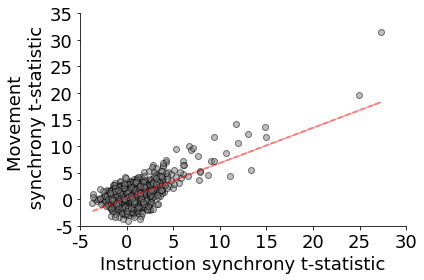

In [28]:
# correlation between isntruct and move
G_i.plot_scatter(rvl_tstats_i,rvl_tstats_m,plotLine=True);
ax = plt.gca()
ax.set_xlabel('Instruction synchrony t-statistic',fontsize=18)
ax.set_ylabel('Movement \n synchrony t-statistic',fontsize=18)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=18)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=18)
ax.set_title('')
save_fig('grp_sync_i_v_m')

### Figure 6,7. Relating theta synchrony to pairwise distance, frequency difference and HFA

ANOVA for instruct synchrony by group (fstat,p)
5.006 0.002


Post hoc t-test of clus 2 vs. all
2.508 0.012


ANOVA for movement synchrony by group (fstat,p)
6.663 0.0


Post hoc t-test of clus 2 vs. all
3.43 0.001


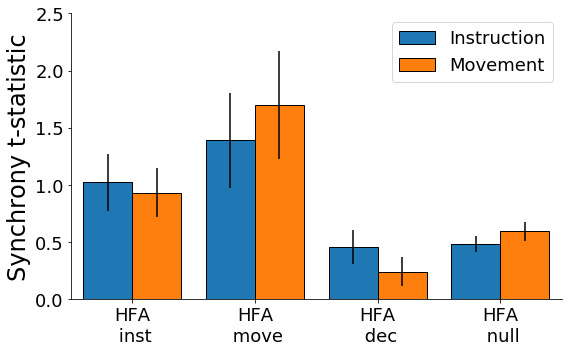

In [42]:
# plot by within cluster interactions
query_list = ['(clusId==1)&(other_clusId==1)',\
                  '(clusId==2)&(other_clusId==2)',\
                  '(clusId==3)&(other_clusId==3)',\
                  '(clusId==4)&(other_clusId==4)',\
                  ]
f = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    
    
    # plot inst
    ax.bar(i-.2,rvl_tstats_i[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_i[query_bool]),width=0.4,\
           color='C0',\
           edgecolor='k')
    
    # plot move
    ax.bar(i+.2,rvl_tstats_m[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_m[query_bool]),width=0.4,\
           color='C1',\
           edgecolor='k')
ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['HFA\n inst','HFA\n move','HFA\n dec','HFA\n null'],\
                  rotation=0,fontsize=18)
#ax.set_xlabel('',fontsize=14)
ax.set_ylabel('Synchrony t-statistic',fontsize=24)
ax.set_ylim([0,2.5])
ax.set_yticklabels(ax.get_yticks(),fontsize=18)
plt.legend((ax.findobj()[10],ax.findobj()[11]),\
           ['Instruction','Movement'],fontsize =18)
save_fig('grp_sync_t_withinClus')

pvals_list = []

print('ANOVA for instruct synchrony by group (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_i[phsdf_i.eval(query_list[0])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[2])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[3])])
pvals_list.append(p)
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                       rvl_tstats_i[phsdf_i.eval(query_list[1])==False])
pvals_list.append(p)
print(np.round(t,3),np.round(p,3))
print('\n')

print('ANOVA for movement synchrony by group (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_m[phsdf_m.eval(query_list[0])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[2])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[3])])
pvals_list.append(p)
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                       rvl_tstats_m[phsdf_m.eval(query_list[1])==False])
pvals_list.append(p)
print(np.round(t,3),np.round(p,3))

ANOVA for instruct synchrony between groups (fstat,p)
4.967 0.002


Post hoc t-test of clus 2 vs. all
2.704 0.007


ANOVA for movement synchrony between group (fstat,p)
7.685 0.0


Post hoc t-test of clus 2 vs. all
3.495 0.0
[ True  True  True  True  True  True  True  True] [0.003 0.012 0.001 0.001 0.003 0.008 0.    0.001]


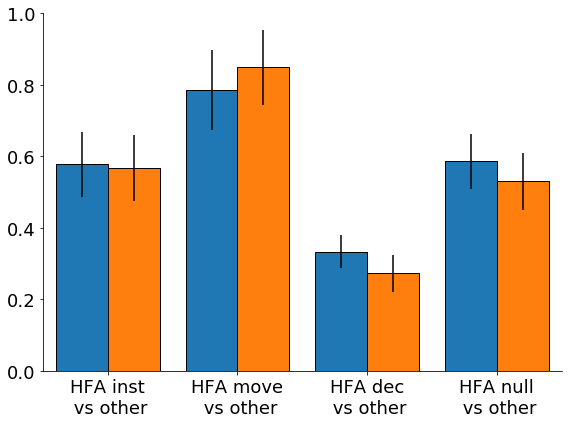

In [43]:
# plot by between cluster interactions
query_list = ['((clusId==1)&(other_clusId!=1))|((clusId!=1)&(other_clusId==1))',\
                  '((clusId==2)&(other_clusId!=2))|((clusId!=2)&(other_clusId==2))',\
                  '((clusId==3)&(other_clusId!=3))|((clusId!=3)&(other_clusId==3))',\
                  '((clusId==4)&(other_clusId!=4))|((clusId!=4)&(other_clusId==4))',\
             ]
f = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i-.2,rvl_tstats_i[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_i[query_bool]),width=0.4,\
           color='C0',\
           edgecolor='k')
    
    # plot move
    ax.bar(i+.2,rvl_tstats_m[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_m[query_bool]),width=0.4,\
           color='C1',\
           edgecolor='k')

ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['HFA inst\n vs other','HFA move\n vs other','HFA dec\n vs other',\
                           'HFA null\n vs other'],\
                  rotation=0,fontsize=18);
ax.set_ylim([0,1.0])
ax.set_yticklabels(np.round(ax.get_yticks(),1),fontsize=18)
#ax.set_xlabel('out of group',fontsize=18)
#ax.set_ylabel('Synchrony t-statistic',fontsize=18)
#plt.legend((ax.findobj()[14],ax.findobj()[15]),['Sync during Instruction','Sync during Move'])
save_fig('grp_sync_t_betweenClus')

print('ANOVA for instruct synchrony between groups (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_i[phsdf_i.eval(query_list[0])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[2])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[3])])
pvals_list.append(p)
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                       rvl_tstats_i[phsdf_i.eval(query_list[1])==False])
pvals_list.append(p)
print(np.round(t,3),np.round(p,3))
print('\n')

print('ANOVA for movement synchrony between group (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_m[phsdf_m.eval(query_list[0])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[2])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[3])])
pvals_list.append(p)
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                       rvl_tstats_m[phsdf_m.eval(query_list[1])==False])
pvals_list.append(p)
print(np.round(t,3),np.round(p,3))

from statsmodels.stats.multitest import multipletests as FDR

reject,pvals_corrected,AS,AB =  FDR(pvals = np.array(pvals_list), alpha = 0.05,method = 'fdr_bh')
print(reject,np.round(pvals_corrected,3))

In [ ]:
# plot distance by cluster interactions
query_list = ['(clusId==1)&(other_clusId==1)',\
                  '(clusId==2)&(other_clusId==2)',\
                  '(clusId==3)&(other_clusId==3)',\
                  '(clusId==4)&(other_clusId==4)']
dist = np.squeeze(np.stack(phsdf_i['pairwise_dist'].to_numpy()))
f = plt.figure()
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i,dist[query_bool].mean(),\
           yerr=stats.sem(dist[query_bool]),width=0.8,\
           color='0.5',\
           edgecolor='k')
ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=(list(np.arange(0,len(query_list))+1)));
ax.set_xlabel('evHFA within group',fontsize=14)
ax.set_ylabel('pairwise distance (mm)',fontsize=14)
ax.set_ylim([30,75])
save_fig('grp_distWithinClus')



In [ ]:
# plot by within region interactions
query_list = ['(ROI=="MTL")&(other_ROI=="MTL")',\
                  '(ROI=="perirolandic")&(other_ROI=="perirolandic")',\
                  '(ROI=="prefrontal")&(other_ROI=="prefrontal")',\
                  '(ROI=="parietal")&(other_ROI=="parietal")',\
                  '(ROI=="temporal")&(other_ROI=="temporal")']
f = plt.figure()
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    
    
    # plot inst
    ax.bar(i-.2,rvl_tstats_i[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_i[query_bool]),width=0.4,\
           color='C0',\
           edgecolor='k')
    
    # plot move
    ax.bar(i+.2,rvl_tstats_m[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_m[query_bool]),width=0.4,\
           color='C1',\
           edgecolor='k')
ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['MTL','perirolandic','prefrontal','parietal','temporal'],\
                  rotation=45);ax.set_xlabel('evHFA within group',fontsize=14)
ax.set_ylabel('Synchrony t-statistic',fontsize=14)
ax.set_ylim([0,7])
plt.legend((ax.findobj()[10],ax.findobj()[11]),['Synch during instruction','Synch during movement'])
save_fig('grp_sync_t_withinReg')



In [ ]:
# plot distance by cluster interactions
query_list = ['(ROI=="MTL")&(other_ROI=="MTL")',\
                  '(ROI=="perirolandic")&(other_ROI=="perirolandic")',\
                  '(ROI=="prefrontal")&(other_ROI=="prefrontal")',\
                  '(ROI=="parietal")&(other_ROI=="parietal")',\
                  '(ROI=="temporal")&(other_ROI=="temporal")']
dist = np.squeeze(np.stack(phsdf_i['pairwise_dist'].to_numpy()))
f = plt.figure()
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i,dist[query_bool].mean(),\
           yerr=stats.sem(dist[query_bool]),width=0.8,\
           color='0.5',\
           edgecolor='k')
ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=(list(np.arange(0,len(query_list))+1)));
ax.set_xlabel('evHFA within group',fontsize=14)
ax.set_ylabel('pairwise distance (mm)',fontsize=14)
ax.set_ylim([0,55])
save_fig('grp_distWithinReg')



In [ ]:
# plot by between cluster interactions
query_list = ['((clusId==1)&(other_clusId!=1))|((clusId!=1)&(other_clusId==1))',\
                  '((clusId==2)&(other_clusId!=2))|((clusId!=2)&(other_clusId==2))',\
                  '((clusId==3)&(other_clusId!=3))|((clusId!=3)&(other_clusId==3))',\
                  '((clusId==4)&(other_clusId!=4))|((clusId!=4)&(other_clusId==4))',\
             ]

f = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i,dist[query_bool].mean(),\
           yerr=stats.sem(dist[query_bool]),width=0.8,\
           color='0.5',\
           edgecolor='k')

ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['instHFA vs other','moveHFA vs other','decHFA vs other',\
                           'noHFA vs other'],\
                  rotation=45);ax.set_xlabel('evHFA between group',fontsize=14)
ax.set_ylabel('Distance',fontsize=14)
ax.set_ylim([30,75])
save_fig('grp_dist_betweenClus')

In [ ]:
# plot by between region interactions
query_list = ['((ROI=="MTL")&(other_ROI!="MTL"))|((ROI!="MTL")&(other_ROI=="MTL"))',\
                  '((ROI=="perirolandic")&(other_ROI!="perirolandic"))|((ROI!="perirolandic")&(other_ROI=="perirolandic"))',\
                  '((ROI=="parietal")&(other_ROI!="parietal"))|((ROI!="parietal")&(other_ROI=="parietal"))',\
                  '((ROI=="temporal")&(other_ROI!="temporal"))|((ROI!="temporal")&(other_ROI=="temporal"))',\
             ]



f = plt.figure()
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    
    
    # plot inst
    ax.bar(i-.2,rvl_tstats_i[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_i[query_bool]),width=0.4,\
           color='C0',\
           edgecolor='k')
    
    # plot move
    ax.bar(i+.2,rvl_tstats_m[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_m[query_bool]),width=0.4,\
           color='C1',\
           edgecolor='k')
ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['MTL vs.','perirolandic  vs.','prefrontal  vs.','parietal  vs.','temporal  vs.'],\
                  rotation=45);ax.set_xlabel('evHFA between regions',fontsize=14)
ax.set_ylabel('Synchrony t-statistic',fontsize=14)
ax.set_ylim([0,1])
plt.legend((ax.findobj()[10],ax.findobj()[11]),['Synch during instruction','Synch during movement'])
save_fig('grp_sync_t_betweenReg')



In [ ]:
# plot by between cluster interactions
query_list = ['((ROI=="MTL")&(other_ROI!="MTL"))|((ROI!="MTL")&(other_ROI=="MTL"))',\
                  '((ROI=="perirolandic")&(other_ROI!="perirolandic"))|((ROI!="perirolandic")&(other_ROI=="perirolandic"))',\
                  '((ROI=="parietal")&(other_ROI!="parietal"))|((ROI!="parietal")&(other_ROI=="parietal"))',\
                  '((ROI=="temporal")&(other_ROI!="temporal"))|((ROI!="temporal")&(other_ROI=="temporal"))',\
             ]


f = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i,dist[query_bool].mean(),\
           yerr=stats.sem(dist[query_bool]),width=0.8,\
           color='0.5',\
           edgecolor='k')

ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['instHFA vs other','moveHFA vs other','decHFA vs other',\
                           'noHFA vs other'],\
                  rotation=45);ax.set_xlabel('evHFA between group',fontsize=14)
ax.set_ylabel('Distance',fontsize=14)
ax.set_ylim([30,75])
save_fig('grp_dist_betweenReg')

In [ ]:
# plot by between cluster interactions (related to movement )
query_list = ['((clusId==1)&(other_clusId==2))|((clusId==2)&(other_clusId==1))',\
              '((clusId==2)&(other_clusId==3))|((clusId==3)&(other_clusId==2))',\
              '((clusId==2)&(other_clusId==4))|((clusId==4)&(other_clusId==2))',\
             ]
f = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i-.2,rvl_tstats_i[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_i[query_bool]),width=0.4,\
           color='C0',\
           edgecolor='k')
    
    # plot move
    ax.bar(i+.2,rvl_tstats_m[query_bool].mean(),\
           yerr=stats.sem(rvl_tstats_m[query_bool]),width=0.4,\
           color='C1',\
           edgecolor='k')

ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['moveHFA vs instHFA','moveHFA vs decHFA','moveHFA vs noHFA'],\
                  rotation=45);
ax.set_ylim([0,1.35])
ax.set_xlabel('evHFA between group',fontsize=14)
ax.set_ylabel('Synchrony t-statistic',fontsize=14)
plt.legend((ax.findobj()[6],ax.findobj()[7]),['Sync during Instruction','Sync during Move'])
save_fig('grp_sync_t_betweenClus_moveFocused')

print('ANOVA for instruct synchrony between groups (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_i[phsdf_i.eval(query_list[0])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                     rvl_tstats_i[phsdf_i.eval(query_list[2])])
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_i[phsdf_i.eval(query_list[1])],\
                       rvl_tstats_i[phsdf_i.eval(query_list[1])==False])
print(np.round(t,3),np.round(p,3))
print('\n')

print('ANOVA for movement synchrony between group (fstat,p)')
f,p = stats.f_oneway(rvl_tstats_m[phsdf_m.eval(query_list[0])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                     rvl_tstats_m[phsdf_m.eval(query_list[2])])
print(np.round(f,3),np.round(p,3))
print('\n')
print('Post hoc t-test of clus 2 vs. all')
[t,p] = stats.ttest_ind(rvl_tstats_m[phsdf_m.eval(query_list[1])],\
                       rvl_tstats_m[phsdf_m.eval(query_list[1])==False])
print(np.round(t,3),np.round(p,3))

In [ ]:
# plot by between cluster interactions
query_list = ['((clusId==1)&(other_clusId==2))|((clusId==2)&(other_clusId==1))',\
              '((clusId==2)&(other_clusId==3))|((clusId==3)&(other_clusId==2))',\
              '((clusId==2)&(other_clusId==4))|((clusId==4)&(other_clusId==2))',\
             ]

f = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
for i in np.arange(0,len(query_list)):
    query_bool = phsdf_i.eval(query_list[i])
    # plot inst
    ax.bar(i,dist[query_bool].mean(),\
           yerr=stats.sem(dist[query_bool]),width=0.8,\
           color='0.5',\
           edgecolor='k')

ax.set_xticks(np.arange(0,len(query_list)))
ax.set_xticklabels(labels=['moveHFA vs instHFA','moveHFA vs decHFA','moveHFA vs noHFA'],\
                  rotation=45);
ax.set_xlabel('evHFA between group',fontsize=14)
ax.set_ylabel('Synchrony t-statistic',fontsize=14)
ax.set_ylim([30,75])
save_fig('grp_dist_betweenClus_moveFocused')

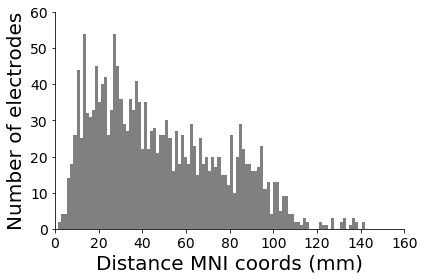

In [22]:
# plot anatomical distance distribution
f = plt.figure()
ax = plt.subplot(111)
dist = np.squeeze(np.stack(phsdf_i['pairwise_dist'].to_numpy()))
ax.hist(dist,color='0.5',bins=100);
ax.set_xlabel('Distance MNI coords (mm)',fontsize=20)
ax.set_ylabel('Number of electrodes',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
save_fig('distance_dist')

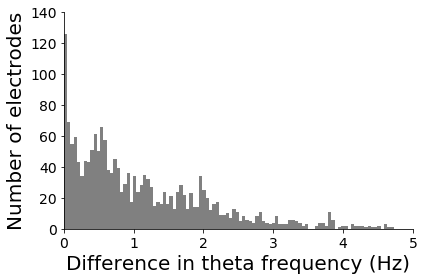

In [24]:
# plot theta center frequency difference distribution
f = plt.figure()
ax = plt.subplot(111)
theta_cf_diff = phsdf_i['theta_cf_diff'].to_numpy()
ax.hist(theta_cf_diff,color='0.5',bins=100);
ax.set_xlabel('Difference in theta frequency (Hz)',fontsize=20)
ax.set_ylabel('Number of electrodes',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
save_fig('theta_cf_diff_dist')

[Text(0, 0.0, '0'),
 Text(0, 0.2, '0'),
 Text(0, 0.4, '0'),
 Text(0, 0.6000000000000001, '0'),
 Text(0, 0.8, '0'),
 Text(0, 1.0, '1')]

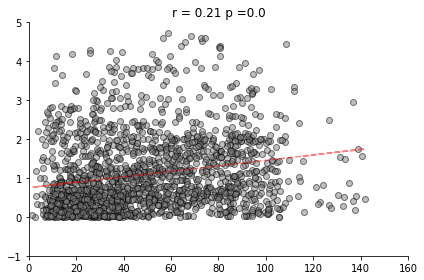

In [28]:
# plot theta center frequency difference distribution

y = theta_cf_diff
x = dist
x,y=G_i.plot_scatter(x,y);
ax.set_xlabel('Difference in theta frequency (Hz)',fontsize=20)
ax.set_ylabel('Number of electrodes',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=14)
#save_fig('theta_cf_diff_dist')

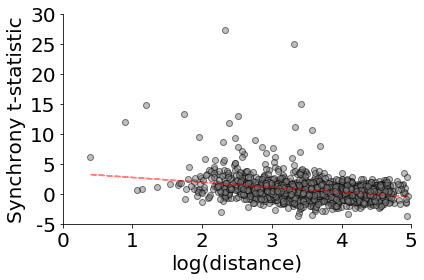

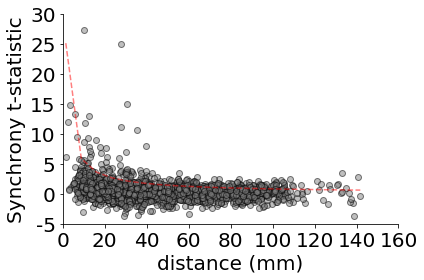

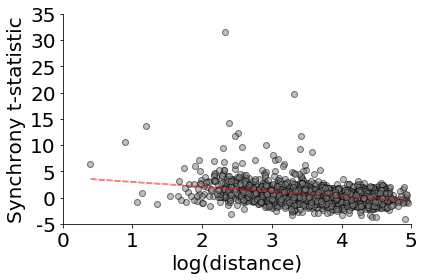

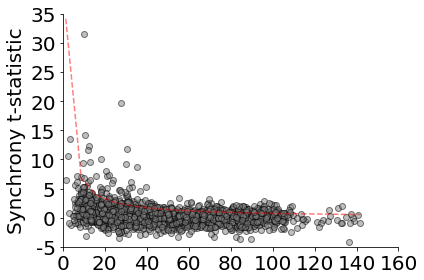

In [67]:
# Plot synch vs. anatomical distance (This requires a power law fit)
t_idx = np.argmin(np.absolute(phsdf_i['params'].iloc[0]['offset_ms']-offset_of_interest_ms))
dist = np.squeeze(np.stack(phsdf_i['pairwise_dist'].to_numpy()))
rvl_tstats_i = np.stack(phsdf_i['RVL_tVsNull_t'].to_numpy())[:,t_idx]
rvl_tstats_m = np.stack(phsdf_m['RVL_tVsNull_t'].to_numpy())[:,t_idx]


# plot log vs. log (use these data to obtain coefficients for power law fit)
y = rvl_tstats_i
x = np.log(dist)
x,y=G_i.plot_scatter(x,y);
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax = plt.gca()
ax.set_xlabel('log(distance)',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')

save_fig('scatter_inst_sync_dist_log')

# plot raw data with power law fit
y = rvl_tstats_i
x = dist
x,y = G_i.plot_scatter(x,y,plotLine=False);
# fit power law
x_mod = np.linspace(np.min(x),np.max(x),20)
ax = plt.gca()
ax.plot(x_mod,(np.e**intercept)*(x_mod**slope),'r', linestyle='dashed',alpha=0.5)
ax.set_xlabel('distance (mm)',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_inst_sync_dist')


#### MOVE

# plot log vs. log (use these data to obtain coefficients for power lay fit)
y = rvl_tstats_m
x = np.log(dist)
x,y=G_i.plot_scatter(x,y);
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax = plt.gca()
ax.set_xlabel('log(distance)',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_move_sync_dist_log')

# plot raw data with power law fit
y = rvl_tstats_m
x = dist
x,y = G_i.plot_scatter(x,y,plotLine=False);
# fit power law
x_mod = np.linspace(np.min(x),np.max(x),20)
ax = plt.gca()
ax.plot(x_mod,(np.e**intercept)*(x_mod**slope),'r', linestyle='dashed',alpha=0.5)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_move_sync_dist')

'\n# plot scatter ( Linear fit)\ny = rvl_tstats[theta_cf_diff>.5]\nx = theta_cf_diff[theta_cf_diff>.5]\nG.plot_scatter(x,y);\n'

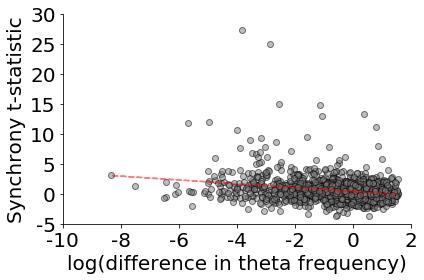

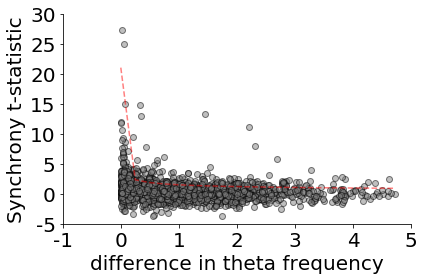

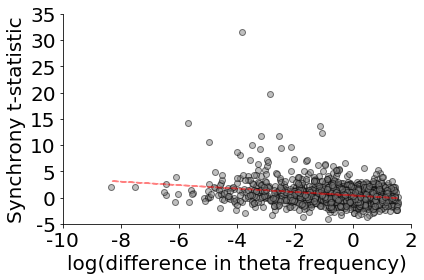

In [68]:
# plot synchrony vs. theta freq difference
theta_cf_diff_i = phsdf_i['theta_cf_diff'].to_numpy()
theta_cf_diff_m = phsdf_m['theta_cf_diff'].to_numpy()



# plot scatter ( Linear fit)
y = rvl_tstats_i
x = np.log(theta_cf_diff_i)
G_i.plot_scatter(x,y);
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax = plt.gca()
ax.set_xlabel('log(difference in theta frequency)',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_inst_sync_logthetaDiff')

# plot scatter ( Linear fit)
y = rvl_tstats_i
x = theta_cf_diff_i
G_i.plot_scatter(x,y,plotLine=False);
ax = plt.gca()
# fit power law
x_mod = np.linspace(np.min(x),np.max(x),20)
ax = plt.gca()
ax.plot(x_mod,(np.e**intercept)*(x_mod**slope),'r', linestyle='dashed',alpha=0.5)
ax.set_xlabel('difference in theta frequency',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_inst_sync_thetaDiff')




# plot scatter ( Linear fit)
y = rvl_tstats_m
x = np.log(theta_cf_diff_m)
G_i.plot_scatter(x,y);
ax = plt.gca()
ax.set_xlabel('log(difference in theta frequency)',fontsize=20)
ax.set_ylabel('Synchrony t-statistic',fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype('int'),fontsize=20)
ax.set_yticklabels(ax.get_yticks().astype('int'),fontsize=20)
ax.set_title('')
save_fig('scatter_move_sync_thetaDiff')

"""
# plot scatter ( Linear fit)
y = rvl_tstats[theta_cf_diff>.5]
x = theta_cf_diff[theta_cf_diff>.5]
G.plot_scatter(x,y);
"""

In [25]:
# Take mean of evHFA at each pair
postInst_pairHFA = np.nanmean(np.vstack((phsdf_i['postInst_HFA'].to_numpy(),\
                              phsdf_i['other_postInst_HFA'].to_numpy())).T,axis=1)
postMove_pairHFA = np.nanmean(np.vstack((phsdf_i['postMove_HFA'].to_numpy(),\
                              phsdf_i['other_postMove_HFA'].to_numpy())).T,axis=1)



reg_dict = {'rvl_tstats_i':rvl_tstats_i,\
            'rvl_tstats_m':rvl_tstats_m,\
           'dist':np.log(dist),\
            'theta_cf_diff':np.log(theta_cf_diff_i),\
           'postInst_HFA':postInst_pairHFA,\
           'postMove_HFA':postMove_pairHFA,
            'subj':phsdf_i['subj'].to_numpy(),\
           'roi':phsdf_i['ROI'].to_numpy()}
pval_list = []
#

# Instruct
reg_inst_distFreqHFA = smf.ols('rvl_tstats_i ~ dist + theta_cf_diff + postInst_HFA', data = reg_dict).fit()
print(reg_inst_distFreqHFA.summary())
pval_list.extend(list(reg_inst_distFreqHFA.pvalues.to_numpy()))

# MOVE
reg_move_distFreqHFA = smf.ols('rvl_tstats_m ~ dist + theta_cf_diff + postMove_HFA', data = reg_dict).fit()
print(reg_move_distFreqHFA.summary())
pval_list.extend(list(reg_move_distFreqHFA.pvalues.to_numpy()))

# instruct synch -  MOVE HFA
reg_imove_distFreqHFA = smf.ols('rvl_tstats_i ~ dist + theta_cf_diff + postMove_HFA', data = reg_dict).fit()
print(reg_imove_distFreqHFA.summary())
#pval_list.extend(list(reg_imove_distFreqHFA.pvalues.to_numpy()))


#pval_list
#FDR correction
from statsmodels.stats.multitest import multipletests as FDR

reject,pvals_corrected,AS,AB =  FDR(pvals = np.array(pval_list), alpha = 0.05,method = 'fdr_bh')
vars_list = list(reg_inst_distFreqHFA.params.keys())+list(reg_move_distFreqHFA.params.keys())
#print(vars_list,np.round(pvals_corrected,3))
print(vars_list,np.round(pvals_corrected,3))

#pval_list

                            OLS Regression Results                            
Dep. Variable:           rvl_tstats_i   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     83.97
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           7.49e-51
Time:                        22:24:51   Log-Likelihood:                -3569.2
No. Observations:                1806   AIC:                             7146.
Df Residuals:                    1802   BIC:                             7168.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9208      0.234     12.483

In [ ]:
"""
# MIXED MODELS

# Random Effects:
# Subject
# Region (nested within subject)
pval_list = []
# for inst group:
reg_i = smf.mixedlm('rvl_tstats_i ~  dist + theta_cf_diff + postInst_HFA ',\
                                   data = reg_dict,groups='subj').fit()
pval_list.extend(list(reg_i.pvalues.to_numpy()))
print(reg_i.summary())

# for inst group:
reg_m = smf.mixedlm('rvl_tstats_m ~  dist + theta_cf_diff + postMove_HFA',\
                                   data = reg_dict,groups='subj').fit()
pval_list.extend(list(reg_m.pvalues.to_numpy()))
print(reg_m.summary())

reject,pvals_corrected,AS,AB =  FDR(pvals = np.array(pval_list), alpha = 0.05,method = 'fdr_bh')
print(reject,np.round(pvals_corrected,3))

"""

(-5, 5)

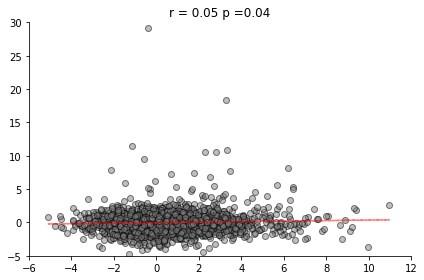

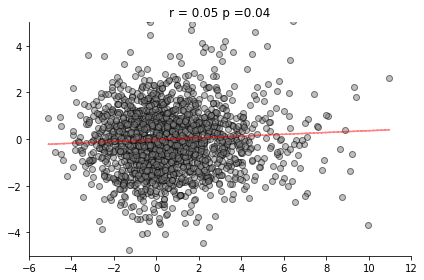

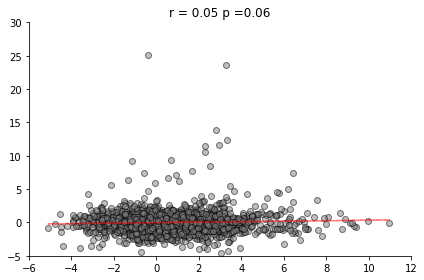

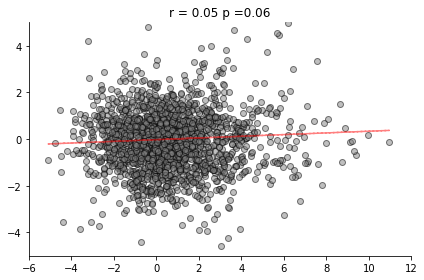

In [26]:
# scatter: synch vs post-move HFA

reg_inst_distFreq= smf.ols('rvl_tstats_i ~ dist + theta_cf_diff', data = reg_dict).fit()
#print(reg_inst_distFreq.summary())

reg_move_distFreq= smf.ols('rvl_tstats_m ~ dist + theta_cf_diff', data = reg_dict).fit()
#print(reg_move_distFreq.summary())


G_i.plot_scatter(reg_dict['postMove_HFA'],reg_move_distFreq.resid);
ax = plt.gca()


G_i.plot_scatter(reg_dict['postMove_HFA'],reg_move_distFreq.resid);
ax = plt.gca()
ax.set_ylim([-5,5])

# scatter: synch vs post-inst HFA
G_m.plot_scatter(reg_dict['postMove_HFA'],reg_inst_distFreq.resid);
ax = plt.gca()


G_m.plot_scatter(reg_dict['postMove_HFA'],reg_inst_distFreq.resid);
ax = plt.gca()
ax.set_ylim([-5,5])

In [30]:
# PHASE EFFECTOR SELECTIVITY 
t_idx = np.argmin(np.absolute(phsdf_i['params'].iloc[0]['offset_ms']-offset_of_interest_ms))
phs_sel_i = np.vstack(phsdf_i['circanov_evitem_p'].to_numpy())[:,t_idx]
phs_sel_m = np.vstack(phsdf_m['circanov_evitem_p'].to_numpy())[:,t_idx]


#query_str='(clusId==1)|(other_clusId==1)'
query_str='clusId>0'

rm_idx = (np.isnan(phs_sel_i) | np.isnan(phs_sel_m)) 
query_bool = (phsdf_i.eval(query_str))


counts_inst_sel = np.count_nonzero(phs_sel_i<0.05)
counts_move_sel = np.count_nonzero(phs_sel_m<0.05)

                                   



chisq,p = stats.chisquare(f_obs=counts_inst_sel, \
                          f_exp=len(phs_sel_i)*0.05)
print('observed:  ',counts_inst_sel)
print('expected:  ',len(phs_sel_i)*0.05)
print('chisq',np.round(chisq,3),np.round(p,4))

chisq,p = stats.chisquare(f_obs=counts_inst_sel, \
                          f_exp=len(phs_sel_i)*0.05)
print('observed:  ',counts_move_sel)
print('expected:  ',len(phs_sel_m)*0.05)
print('chisq',np.round(chisq,3),np.round(p,4))






observed:   80
expected:   90.30000000000001
chisq 1.175 nan
observed:   105
expected:   90.30000000000001
chisq 1.175 nan


In [72]:
%%capture
# plot on brain
G = mm.Group(subj_list=None,clusId_list=None,roi_list = None)
G.calc_lfo(ev_type=None,offset_ms = 0, duration_ms = 5000)

has_theta_peak = np.isnan(np.vstack(G.groupDf_lfo['theta'].to_numpy())[:,0])==False
#print(has_theta_peak)

noHFA = (G.groupDf_lfo['clusId']==2).to_numpy()
#print(noHFA.to_numpy())


xs= G.groupDf_lfo['x'].to_numpy()[:,np.newaxis]
ys =G.groupDf_lfo['y'].to_numpy()[:,np.newaxis]
zs = G.groupDf_lfo['z'].to_numpy()[:,np.newaxis]
zs[zs>55] = 55

coords = np.hstack((xs,ys,zs))

In [73]:
from nilearn import plotting
#plot right
view = plotting.view_markers(coords[(xs[:,0]>0)&has_theta_peak&noHFA,:],marker_size=10)
view.open_in_browser()

#plot left
view = plotting.view_markers(coords[(xs[:,0]<0)&has_theta_peak&noHFA,:],marker_size=10)
view.open_in_browser()



